# Bootcamp: Cientista de Dados: Teste de Hipótese

- Data: junho de 2022.

## Autor

Feito por [Alexsander Lopes Camargos](https://github.com/alexcamargos). Entre em contato!

[![GitHub](https://img.shields.io/badge/-AlexCamargos-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=github&logoColor=white&link=https://github.com/alexcamargos)](https://github.com/alexcamargos)
[![Twitter Badge](https://img.shields.io/badge/-@alcamargos-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=twitter&logoColor=white&link=https://twitter.com/alcamargos)](https://twitter.com/alcamargos)
[![Linkedin Badge](https://img.shields.io/badge/-alexcamargos-1ca0f1?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/alexcamargos/)](https://www.linkedin.com/in/alexcamargos/)
[![Gmail Badge](https://img.shields.io/badge/-alcamargos@vivaldi.net-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=Gmail&logoColor=white&link=mailto:alcamargos@vivaldi.net)](mailto:alcamargos@vivaldi.net)

## Licença

[MIT License](https://choosealicense.com/licenses/mit/)

# Hipóteses Estatísticas (Teste de hipótese)

O teste de hipóteses fornecem ferramentas que nos permitem rejeitar ou não rejeitar uma hipótese estatística através da evidência fornecida pela amostra. É uma metodologia estatística que nos auxilia a tomar decisões sobre uma ou mais populações baseado na informação obtida da amostra. Nos permite verificar se os dados da amostra trazem evidência que apoiem ou não uma hipótese estatística formulada.

Ao tentarmos tomar decisões, é conveniente a formulação de suposições ou de conjeturas sobre as populações de interesse, que, em geral, consistem em considerações sobre parâmetros (_μ_,_σ2_,_p_) das mesmas. Essas suposições, que podem ser ou não verdadeiras, são denominadas *Hipóteses Estatísticas*.

Em muitas situações práticas o interesse do pesquisador é verificar a veracidade sobre um ou mais parâmetros populacionais (_μ_,_σ2_,_p_) ou sobre a distribuição de uma variável aleatória.

Exemplos:
- A produtividade média de café, no estado de Minas Gerais, é de 31,6 sacas de 60 kg por hectare;
- A proporção de peças defeituosas na unidade de fabricação X é de 10%;
- A propaganda produz efeito positivo nas vendas;
- Os métodos de ensino produzem resultados diferentes de aprendizagem.

Um dos primeiros trabalhos sobre testes foi publicado em 1710 por [John Arbuthnot](https://pt.wikipedia.org/wiki/John_Arbuthnot) e um dos primeiros procedimentos estatísticos que chega perto de um teste, no sentido moderno foi proposto por [Karl Pearson](https://pt.wikipedia.org/wiki/Karl_Pearson) em 1900. Esse foi o famoso teste do [Qui-quadrado (Chi-squared)](https://pt.wikipedia.org/wiki/Qui-quadrado), utilizado para comparar uma distribuição de frequência observada com uma distribuição teoricamente assumida. A ideia de testar hipóteses foi posteriormente codificada e elaborada por [Ronald Aylmer Fisher](https://pt.wikipedia.org/wiki/Ronald_Fisher) (1925), que considerou os dados como um vetor de variáveis aleatórias que pertenciam a uma distribuição de probabilidades.

# Teste de hipótese aplicados a churn de clientes

Saber por que um cliente abandona ou deixa de comprar o seu produto é fundamental para garantir um crescimento sustentável a longo prazo para a sua empresa. No entanto, e em meio a tantas métricas que compõe essa categoria de análise, o churn talvez seja a mais básica, e também a mais fundamental como ponto de partida por representar o número total de clientes cancelados. Parece complexo, mas não é.

![Como reduzir o churn dentro da sua empresa](churn.jpg)

## O que significa churn?

Para colocarmos de maneira simples: _churn_ diz respeito aos casos onde um cliente ou utilizador para de comprar ou usar o produto ou serviço de uma empresa. Ou seja, representa o número total de clientes cancelados. Pense assim: de toda a sua carteira de clientes, ao longo dos últimos meses, quantos deles realmente desistiram do seu produto ou serviço? Esse é o seu churn.

Na prática, o churn de clientes atrasa o crescimento da empresa de forma direta por isso, é uma métrica muito importante. Além disso, como já sabemos, é muito mais barato trabalhar para reter clientes atuais do que para conquistar novos clientes. Portanto, é uma perda que, na maioria das vezes, poderia ter sido evitada.

As empresas devem definir um método para calcular o churn e fazer isso de maneira frequente. Monitorar o churn permite identificar possíveis problemas operacionais e técnicos e desenhar melhores estratégias de fidelização.

## Existe uma fórmula certa para calcular churn?

Existem algumas formas diferentes que podem ser usadas para calcular o churn de uma empresa. A maneira mais comum é dividir o número total de clientes que a empresa tem no começo de um determinado período pelo número de clientes perdidos durante esse mesmo tempo. A taxa de churn pode ser representada de outras formas, como, por exemplo, pelo número total de clientes que a empresa perdeu num determinado período, como também pela porcentagem de clientes perdidos num período comparado com o número total de clientes que a empresa possuí.

# Data Acquisition
Os dados originais são do [IBM Developer](https://developer.ibm.com/), e reporta um problema tipico de empresas de telecom. O dataset completo pode ser encontrado [aqui](telecom_customer_churn.csv). Apesar de não existir uma descrição exata, o nome das colunas permite entendermos bem o problema.

## Pacotes e bibliotecas utilizadas
- [Matplotlib](https://matplotlib.org/) — Biblioteca para plotagem de gráficos.
- [pandas](https://pandas.pydata.org/) — Biblioteca para manipulação de dados.
- [seaborn](https://seaborn.pydata.org/) — Biblioteca para visualização de dados.
- [SciPy](https://scipy.org/) - Biblioteca para cálculos matemáticos.

## Importando as bibliotecas

In [1]:
# matplotlib — Biblioteca para plotagem de gráficos
import matplotlib.pyplot as plt

# pandas — Biblioteca para manipulação de dados
import pandas as pd

# seaborn — Biblioteca para visualização de dados
import seaborn as sns

# scipy — Biblioteca para cálculos estatísticos
from scipy import stats as st

In [2]:
# Salvando os gráficos junto (inline) com o notebook.
%matplotlib inline

In [3]:
# Configurando a exibição dos gráficos para o notebook.
sns.set_theme(style='whitegrid', context='notebook')

# Tamanho padrão dos gráficos.
sns.set(rc={'figure.figsize': (12, 6)})

## Importando o dataset

In [4]:
DATA_PATH = r'datasets\telecom_customer_churn.csv'

In [5]:
# Carregando os dados.
dados = pd.read_csv(DATA_PATH)
dados.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6385,0702-PGIBZ,Male,0,No,Yes,4,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.70,364.55,Yes
2497,5702-SKUOB,Female,0,Yes,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.60,93.45,No
6888,3191-CSNMG,Female,0,Yes,Yes,3,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.70,239.45,No
190,7100-FQPRV,Male,0,Yes,Yes,43,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Credit card (automatic),71.90,3173.35,No
4784,1622-HSHSF,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.55,19.55,No
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No
2184,4695-WJZUE,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.55,179.25,Yes
3129,7080-TNUWP,Male,0,Yes,No,70,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),95.00,6602.9,No
3975,2860-RANUS,Female,1,No,No,20,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.80,1727.5,Yes
6016,4250-ZBWLV,Male,0,No,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,108.45,7176.55,Yes


In [6]:
# Descobrindo as dimensões do dataset.
print(f'Nossa base de dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

Nossa base de dados tem 7043 linhas e 21 colunas.


In [7]:
# Visualizando os nomes das colunas.
print(dados.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Para melhor visualização, e para podermos consultar os dados no futuro, caso seja necessário, vamos criar um dataframe auxiliar contendo as informações sobre o tipo dos dados e se existe ou não informações faltantes.

In [8]:
# Explorando o dataset.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Convertendo o tipo das colunas MonthlyCharges e TotalCharges para numérico.
dados.loc[:, 'TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

In [10]:
# Convertendo as variáveis categóricas.
dados[['gender',
       'Partner',
       'Dependents',
       'PhoneService',
       'MultipleLines',
       'InternetService',
       'OnlineSecurity',
       'OnlineBackup',
       'DeviceProtection',
       'TechSupport',
       'StreamingTV',
       'StreamingMovies',
       'Contract',
       'PaperlessBilling',
       'PaymentMethod']] = dados[['gender',
                                  'Partner',
                                  'Dependents',
                                  'PhoneService',
                                  'MultipleLines',
                                  'InternetService',
                                  'OnlineSecurity',
                                  'OnlineBackup',
                                  'DeviceProtection',
                                  'TechSupport',
                                  'StreamingTV',
                                  'StreamingMovies',
                                  'Contract',
                                  'PaperlessBilling',
                                  'PaymentMethod']].astype('category')

In [11]:
# Verificando o tipo dos dados para cada coluna e se existe algum valor nulo.
null_data = pd.DataFrame({'Tipo': dados.dtypes,
                          'Nulo': dados.isna().sum(),
                          'Percentual': round(dados.isna().sum() / dados.shape[0], 2),
                          'Tamanho': dados.shape[0],
                          'Unicos':dados.nunique()})
null_data

,Tipo,Nulo,Percentual,Tamanho,Unicos
customerID,object,0,0.0,7043,7043
gender,category,0,0.0,7043,2
SeniorCitizen,int64,0,0.0,7043,2
Partner,category,0,0.0,7043,2
Dependents,category,0,0.0,7043,2
tenure,int64,0,0.0,7043,73
PhoneService,category,0,0.0,7043,2
MultipleLines,category,0,0.0,7043,3
InternetService,category,0,0.0,7043,3
OnlineSecurity,category,0,0.0,7043,3


Criando gráficos de barras para melhor visualizar todas as colunas categóricas.

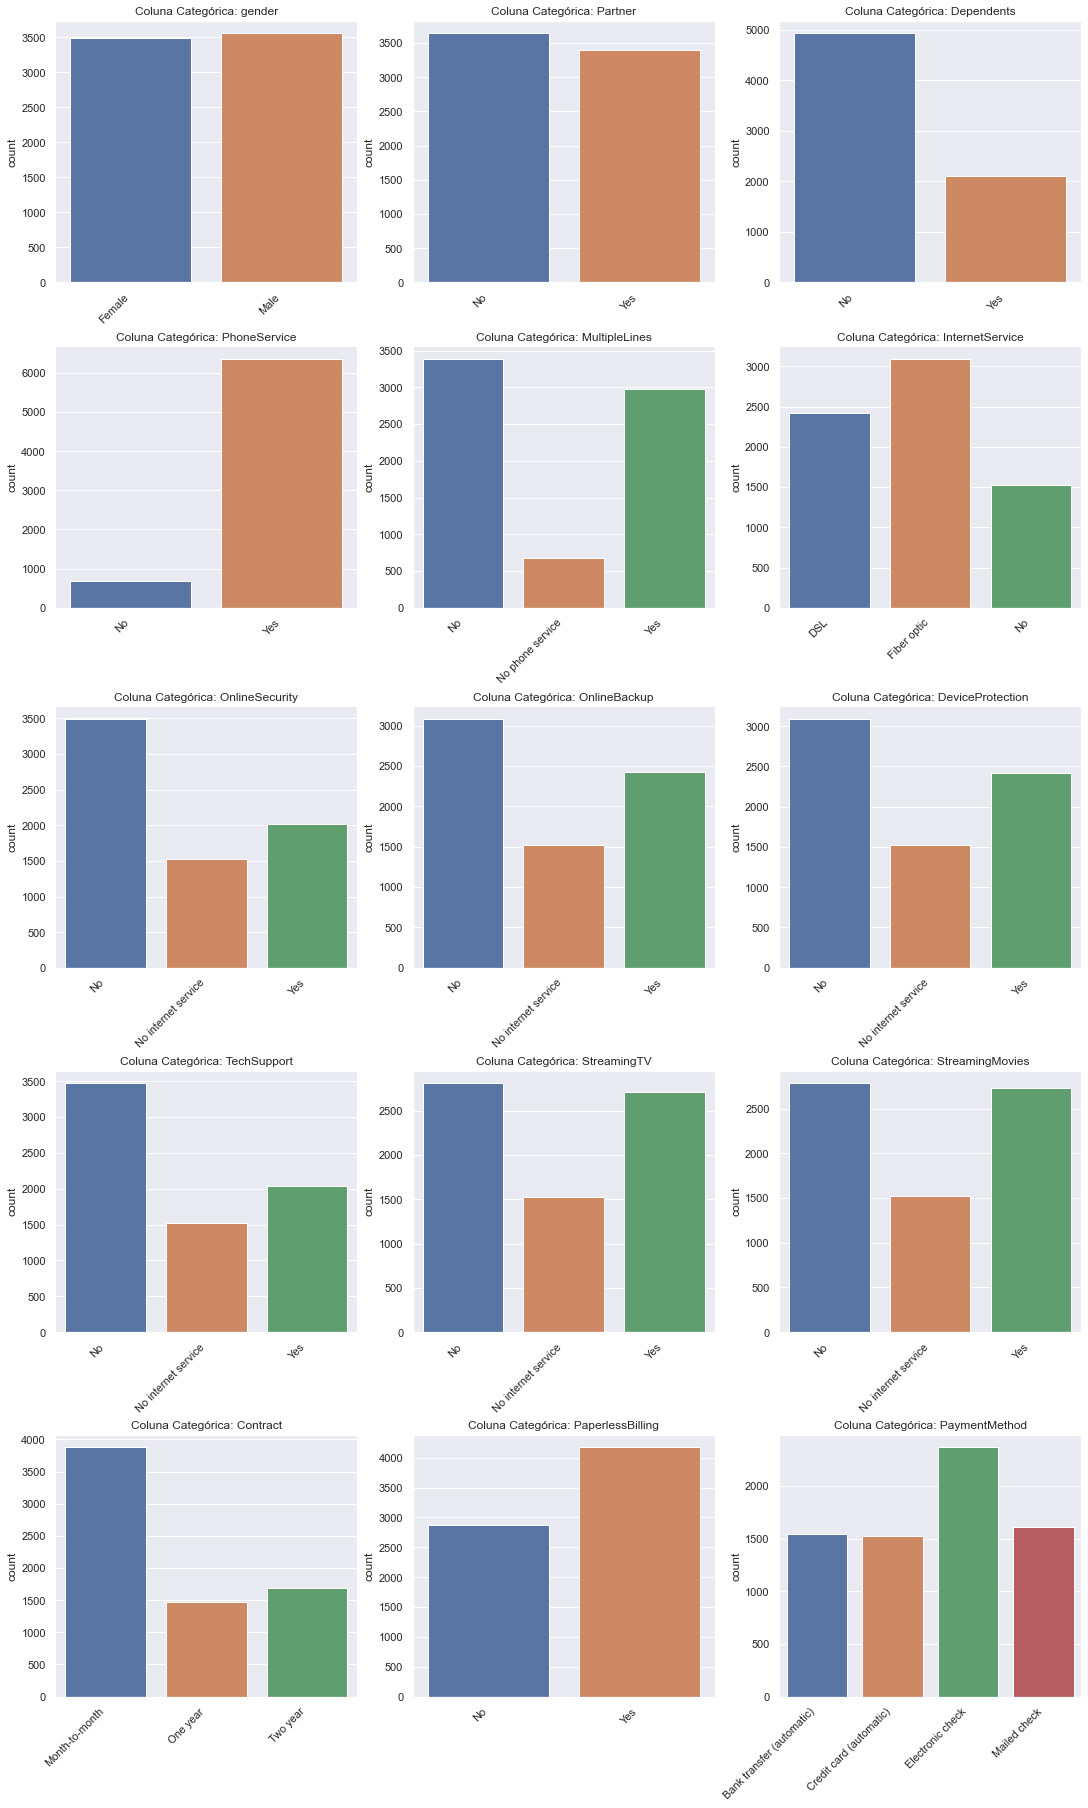

In [12]:
# Configurando a exibição múltipla dos gráficos.
total_plots = len(dados.select_dtypes(include=['category']).columns)
total_column = 3
total_rows = total_plots // total_column
fig, axs = plt.subplots(nrows=total_rows, ncols=total_column, figsize=(5*total_column, 5*total_rows), constrained_layout=True)

# Para cada coluna categórica, criamos um gráfico de barras.
for index, column in enumerate(dados.select_dtypes(include=['category']).columns):
    row = index // total_column
    position = index % total_column
    plot = sns.countplot(x=column, data=dados, ax=axs[row][position])
    plot.set_title(f'Coluna Categórica: {column}')
    plot.set_xlabel('')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')

In [13]:
def test_normal_shapiro_wilk(data, alfa=0.05):
    """Aplica o Teste de Shapiro-Wilk para verificar se os dados são normalmente distribuídos."""

    statistic_w, p_value = st.shapiro(data)

    if len(data) > 5_000:
        if statistic_w < alfa:
            return False

    if p_value < alfa:
        return False

    return True

In [14]:
def test_equal_variances(data_01, data_02, alfa=0.05):
    """Aplica o teste de Levene para determinar se os dados têm a mesma variância."""

    statistic, p_value = st.levene(data_01, data_02)

    if p_value < alfa:
        return False

    return True

In [15]:
def hypothesis_testing(data_01, data_02):
    """Aplica o melhor teste de hipótese baseado nas características dos dados."""

    if test_normal_shapiro_wilk(data_01) and test_normal_shapiro_wilk(data_02):
        if test_equal_variances(data_01, data_02):
            return st.ttest_ind(data_01, data_02)

        return st.ttest_ind(data_01, data_02, equal_var=False)

    return st.mannwhitneyu(data_01, data_02)

## Tipos de contratos

In [16]:
def summary_contract(data):
    """Resume as informações da coluna Contract."""

    contracts_type = data['Contract'].value_counts()

    contract_per_month = contracts_type['Month-to-month']
    contract_one_year = contracts_type['One year']
    contract_two_year = contracts_type['Two year']

    contract_per_month_percentage = round((contract_per_month / data.shape[0]) * 100, 2)
    contract_one_year_percentage = round((contract_one_year / data.shape[0]) * 100, 2)
    contract_two_year_percentage = round((contract_two_year / data.shape[0]) * 100, 2)

    print(f'Percentual de clientes com contrato por mês: {contract_per_month_percentage}%')
    print(f'Percentual de clientes com contrato de um ano: {contract_one_year_percentage}%')
    print(f'Percentual de clientes com contrato de dois anos: {contract_two_year_percentage}%')

In [17]:
# Descobrindo a percentagem dos relacionamentos existentes para todos os clientes.
print(f'Total de clientes: {dados.shape[0]}')

summary_contract(dados)

Total de clientes: 7043
Percentual de clientes com contrato por mês: 55.02%
Percentual de clientes com contrato de um ano: 20.91%
Percentual de clientes com contrato de dois anos: 24.07%


In [18]:
# Descobrindo a percentagem dos relacionamentos existentes para os clientes churn.
client_churn = dados[dados['Churn'] == 'Yes']
print(f'Total de clientes churn: {client_churn.shape[0]}')

summary_contract(client_churn)

Total de clientes churn: 1869
Percentual de clientes com contrato por mês: 88.55%
Percentual de clientes com contrato de um ano: 8.88%
Percentual de clientes com contrato de dois anos: 2.57%


In [19]:
# Descobrindo a percentagem dos relacionamentos existentes para os clientes não churn.
client_not_churn = dados[dados['Churn'] == 'No']
print(f'Total de clientes: {dados.shape[0]}')
print(f'Total de clientes não churn: {client_not_churn.shape[0]}')
print(f'Total de clientes churn: {client_churn.shape[0]}\n')

summary_contract(client_not_churn)

Total de clientes: 7043
Total de clientes não churn: 5174
Total de clientes churn: 1869

Percentual de clientes com contrato por mês: 42.91%
Percentual de clientes com contrato de um ano: 25.26%
Percentual de clientes com contrato de dois anos: 31.83%


In [20]:
a = client_not_churn['Contract'].value_counts().sort_values(ascending=False)
b = client_not_churn['Contract'].value_counts(normalize=True).sort_values(ascending=False).values * 100

In [21]:
[f'{value[0]} ({value[1]:.0f}%)' for value in zip(a, b)]

['2220 (43%)', '1647 (32%)', '1307 (25%)']

In [22]:
def compare_plot(df, ax_plot, variable, title, palette='pastel', x_label=''):
    """ Cria um gráfico de barras para comparação visual de valores."""

    sns.countplot(x=variable, data=df, ax=ax_plot, palette=palette)

    ax_plot.set_title(title)
    ax_plot.set_xlabel(x_label)
    ax_plot.set_xticklabels(ax_plot.get_xticklabels(), rotation=45, ha='right')

    abs_values = df[variable].value_counts().sort_values(ascending=False)
    rel_values = df[variable].value_counts(normalize=True).sort_values(ascending=False).values * 100
    bar_label = [f'{value[0]} ({value[1]:.0f}%)' for value in zip(abs_values, rel_values)]

    ax_plot.bar_label(container=ax_plot.containers[0], labels=bar_label, fontsize=10.5)


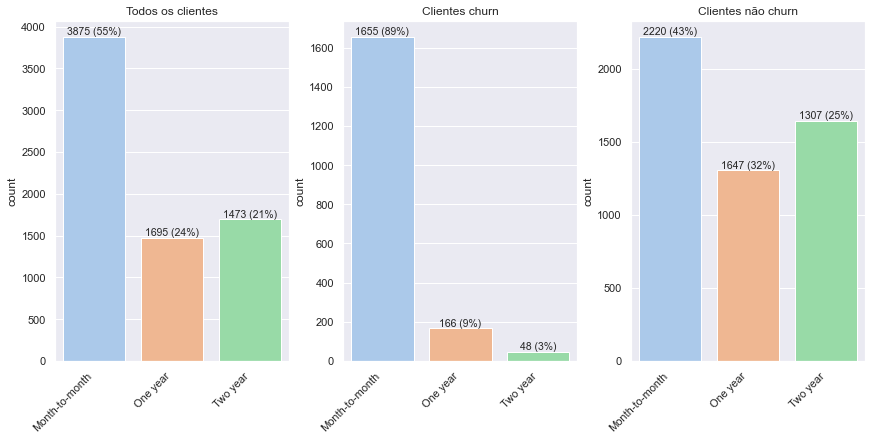

In [23]:
# Gráfico de barras para visualizar os tipos de contratos.
fig, (ax_1, ax_2, ax_3) = plt.subplots(nrows=1, ncols=3, constrained_layout=True)

# Todos os clientes.
compare_plot(dados, ax_1, 'Contract', 'Todos os clientes')

# Clientes churn.
compare_plot(client_churn, ax_2, 'Contract', 'Clientes churn')

# Clientes não churn.
compare_plot(client_not_churn, ax_3, 'Contract', 'Clientes não churn')

## Teste de Hipótese de tipos de contrato - Clientes Churn

- H₀ — Clientes com contratos curtos permanecem ativos por mais tempo.
- H₁ — Clientes com contratos longos permanecem ativos por mais tempo.

In [24]:
# Clientes churn com contratos curtos.
churn_sort = client_churn[client_churn['Contract'] == 'Month-to-month']
churn_sort_mean_tenure = churn_sort['tenure'].mean()
print(f'Tempo médio de permanência para clientes com contratos curtos: {churn_sort_mean_tenure:.2f} meses')
permanancia = ''
# Clientes churn com contratos longos.
churn_log = client_churn[client_churn['Contract'] != 'Month-to-month']
churn_log_mean_tenure = churn_log['tenure'].mean()
print(f'Tempo médio de permanência para clientes com contratos longos: {churn_log_mean_tenure:.2f} meses')

Tempo médio de permanência para clientes com contratos curtos: 14.02 meses
Tempo médio de permanência para clientes com contratos longos: 48.62 meses


In [25]:
# Aplicando o teste de hipótese para tipos de contratos.
grupo_01 = churn_sort['tenure']
grupo_02 = churn_log['tenure']
statistic, p_value = hypothesis_testing(grupo_01, grupo_02)

ic = .95    # Intervalo de confiança de 95%.
alfa = (1 - ic)
print(f'Interpretação do teste de hipótese: Alfa = {alfa:.2f}')

# Interpretação do resultado do teste de hipótese.
if p_value < alfa:
    print('Rejeitamos H₀, os tempos médios de permanência para clientes com contratos curtos e longos são diferentes.')
else:
    print('Não rejeitamos H₁, os tempos médios de permanência para clientes com contratos curtos e longos são iguais.')

Interpretação do teste de hipotesete: Alfa = 0.05
Rejeitamos H₀, os tempos médios de permanência para clientes com contratos curtos e longos são diferentes.


## Teste de Hipótese de tipos de contrato - Clientes Ativos

- H₀ — Com contratos curtos os clientes permanecem ativos por mais tempo.
- H₁ — Com contratos longos os clientes permanecem ativos por mais tempo.

In [26]:
# Clientes não churn com contratos curtos.
not_churn_sort = client_not_churn[client_not_churn['Contract'] == 'Month-to-month']
not_churn_sort_mean_tenure = not_churn_sort['tenure'].mean()
print(f'Tempo médio de permanência para clientes não churn com contratos curtos: {not_churn_sort_mean_tenure:.2f} meses')

# Clientes não churn com contratos longos.
not_churn_log = client_not_churn[client_not_churn['Contract'] != 'Month-to-month']
not_churn_log_mean_tenure = not_churn_log['tenure'].mean()
print(f'Tempo médio de permanência para clientes não churn com contratos longos: {not_churn_log_mean_tenure:.2f} meses')

Tempo médio de permanência para clientes não churn com contratos curtos: 21.03 meses
Tempo médio de permanência para clientes não churn com contratos longos: 50.00 meses


In [27]:
# Aplicando o teste de hipótese para tipos de contratos.
grupo_01 = not_churn_sort['tenure']
grupo_02 = not_churn_log['tenure']
statistic, p_value = hypothesis_testing(grupo_01, grupo_02)

ic = .95    # Intervalo de confiança de 95%.
alfa = (1 - ic)
print(f'Interpretação do teste de hipótese: Alfa = {alfa:.2f}')

if p_value < alfa:
    print('Rejeitamos H₀, os tempos médios de permanência para clientes não churn com contratos curtos e longos são diferentes.')
else:
    print('Não rejeitamos H₁, os tempos médios de permanência para clientes não churn com contratos curtos e longos são iguais.')

Interpretação do teste de hipotesete: Alfa = 0.05
Rejeitamos H₀, os tempos médios de permanência para clientes não churn com contratos curtos e longos são diferentes.


# Identificando fatores que possam influenciar o tempo de permanência.

Existe algum fator que pode influenciar o tempo de permanência dos clientes?

Talvez, o cenário ideal, seja buscar clientes que tenham parceiros, visto que tendo duas pessoas utilizando os serviços, caso uma não use a outra pode usar, evitando assim o cancelamento.

## Proporção de clientes ativos com parceiros

In [28]:
# Porcentagem de clientes não churn com parceiros
not_churn_partner = client_not_churn[client_not_churn['Partner'] == 'Yes']
not_churn_partner_percent = not_churn_partner['tenure'].shape[0] / client_not_churn['tenure'].shape[0]* 100
print(f'Porcentagem de clientes ativos com parceiros: {not_churn_partner_percent:.2f}%')

# Porcentagem de clientes churn sem parceiros.
churn_partner = client_churn[client_churn['Partner'] == 'Yes']
churn_partner_percent = churn_partner['tenure'].shape[0] / client_churn['tenure'].shape[0] * 100
print(f'Porcentagem de clientes churn com parceiros: {churn_partner_percent:.2f}%')

Porcentagem de clientes ativos com parceiros: 52.82%
Porcentagem de clientes churn com parceiros: 35.79%


In [29]:
# Tempo médio de permanência de clientes não churn com parceiros.
not_churn_partner_mean_tenure = not_churn_partner['tenure'].mean()
print(f'Tempo médio de permanência para clientes não churn com parceiros: {not_churn_partner_mean_tenure:.2f} meses')

# Tempo médio de permanência de clientes churn sem parceiros.
churn_partner = client_churn[client_churn['Partner'] == 'No']
churn_partner_mean_tenure = churn_partner['tenure'].mean()
print(f'Tempo médio de permanência para clientes churn sem parceiros: {churn_partner_mean_tenure:.2f} meses')

Tempo médio de permanência para clientes não churn com parceiros: 45.79 meses
Tempo médio de permanência para clientes churn sem parceiros: 13.18 meses


## Teste de Hipótese clientes com/sem parceiros — Clientes Churn

- H₀ — clientes sem parceiro ficam mais tempo
- H₁ — clientes com parceiro ficam mais tempo

In [30]:
# Clientes churn com parceiros.
churn_partner_yes = client_churn[client_churn['Partner'] == 'Yes']
churn_partner_yes_mean_tenure = churn_partner_yes['tenure'].mean()
print(f'Tempo médio de permanência para clientes churn com parceiros: {churn_partner_yes_mean_tenure:.2f} meses')

# Clientes churn sem parceiros.
churn_partner_no = client_churn[client_churn['Partner'] == 'No']
churn_partner_no_mean_tenure = churn_partner['tenure'].mean()
print(f'Tempo médio de permanência para clientes churn sem parceiros: {churn_partner_no_mean_tenure:.2f} meses')

Tempo médio de permanência para clientes churn com parceiros: 26.59 meses
Tempo médio de permanência para clientes churn sem parceiros: 13.18 meses


In [31]:
# Aplicando o teste de hipótese para tipos de contratos.
grupo_01 = churn_partner_yes['tenure']
grupo_02 = churn_partner_no['tenure']
statistic, p_value = hypothesis_testing(grupo_01, grupo_02)

ic = .95    # Intervalo de confiança de 95%.
alfa = (1 - ic)
print(f'Interpretação do teste de hipótese: Alfa = {alfa:.2f}')

if p_value < alfa:
    print('Rejeitamos H₀, os tempos médios de permanência para clientes churn com parceiros e sem parceiros são diferentes.')
else:
    print('Não rejeitamos H₁, os tempos médios de permanência para clientes churn com parceiros e sem parceiros são iguais.')

Interpretação do teste de hipotesete: Alfa = 0.05
Rejeitamos H₀, os tempos médios de permanência para clientes churn com parceiros e sem parceiros são diferentes.


## Teste de Hipótese clientes com/sem parceiros — Clientes Ativos

- H₀ — clientes sem parceiro ficam mais tempo
- H₁ — clientes com parceiro ficam mais tempo

In [32]:
# Clientes não churn com parceiros.
not_churn_partner_yes = client_not_churn[client_not_churn['Partner'] == 'Yes']
not_churn_partner_yes_mean_tenure = not_churn_partner_yes['tenure'].mean()
print(f'Tempo médio de permanência para clientes não churn com parceiros: {not_churn_partner_yes_mean_tenure:.2f} meses')

# Clientes churn sem parceiros.
not_churn_partner_no = client_not_churn[client_not_churn['Partner'] == 'No']
not_churn_partner_no_mean_tenure = not_churn_partner_no['tenure'].mean()
print(f'Tempo médio de permanência para clientes não churn sem parceiros: {not_churn_partner_no_mean_tenure:.2f} meses')

Tempo médio de permanência para clientes não churn com parceiros: 45.79 meses
Tempo médio de permanência para clientes não churn sem parceiros: 28.36 meses


In [33]:
# Aplicando o teste de hipótese para clientes com/sem parceiros.
grupo_01 = not_churn_partner_yes['tenure']
grupo_02 = not_churn_partner_no['tenure']
statistic, p_value = hypothesis_testing(grupo_01, grupo_02)

ic = .95    # Intervalo de confiança de 95%.
alfa = (1 - ic)
print(f'Interpretação do teste de hipótese: Alfa = {alfa:.2f}')

if p_value < alfa:
    print('Rejeitamos H₀, os tempos médios de permanência para clientes não churn com parceiros e sem parceiros são diferentes.')
else:
    print('Não rejeitamos H₁, os tempos médios de permanência para clientes não churn com parceiros e sem parceiros são iguais.')

Interpretação do teste de hipotesete: Alfa = 0.05
Rejeitamos H₀, os tempos médios de permanência para clientes não churn com parceiros e sem parceiros são diferentes.


Se clientes com parceiros permanecem por mais tempo, será que esta análise se aplica para clientes com dependentes? Vamos aos testes!

## Proporção de clientes com dependentes


In [34]:
# Porcentagem de clientes não churn com dependentes.
not_churn_dependent_yes = client_not_churn[client_not_churn['Dependents'] == 'Yes']
not_churn_dependent_yes_percent = not_churn_dependent_yes['tenure'].shape[0] / client_not_churn['tenure'].shape[0]* 100
print(f'Porcentagem de clientes não churn com dependentes: {not_churn_dependent_yes_percent:.2f}%')

# Porcentagem de clientes churn com dependentes.
churn_dependent_yes = client_churn[client_churn['Dependents'] == 'Yes']
churn_dependent_yes_percent = churn_dependent_yes['tenure'].shape[0]/ client_churn['tenure'].shape[0] * 100
print(f'Porcentagem de clientes churn com dependentes: {churn_dependent_yes_percent:.2f}%')

Porcentagem de clientes não churn com dependentes: 34.48%
Porcentagem de clientes churn com dependentes: 17.44%


In [35]:
# Tempo médio de permanência de clientes não churn com parceiros.
not_churn_dependent_yes_mean_tenure = not_churn_dependent_yes['tenure'].mean()
print(f'Tempo médio de permanência para clientes não churn com dependentes: {not_churn_dependent_yes_mean_tenure:.2f} meses')

# Tempo médio de permanência de clientes churn com parceiros.
churn_dependent_yes_mean_tenure = churn_dependent_yes['tenure'].mean()
print(f'Tempo médio de permanência para clientes churn com dependentes: {churn_dependent_yes_mean_tenure:.2f} meses')

Tempo médio de permanência para clientes não churn com dependentes: 41.35 meses
Tempo médio de permanência para clientes churn com dependentes: 22.03 meses


## Teste de Hipótese para clientes com/sem dependentes — Clientes Churn

H₀ — clientes com pagamento não automático ficam mais tempo
H₁ — clientes com pagamento automático ficam mais tempo

In [36]:
# Clientes não churn com dependentes.
not_churn_dependent_yes = client_not_churn[client_not_churn['Dependents'] == 'Yes']
not_churn_dependent_yes_mean_tenure = not_churn_dependent_yes['tenure'].mean()
print(f'Tempo médio de permanência para clientes não churn com dependentes: {not_churn_dependent_yes_mean_tenure:.2f} meses')

# Clientes churn sem dependentes.
churn_dependent_no = client_churn[client_churn['Dependents'] == 'No']
churn_dependent_no_mean_tenure = churn_dependent_no['tenure'].mean()
print(f'Tempo médio de permanência para clientes churn sem dependentes: {churn_dependent_no_mean_tenure:.2f} meses')

Tempo médio de permanência para clientes não churn com dependentes: 41.35 meses
Tempo médio de permanência para clientes churn sem dependentes: 17.12 meses


In [37]:
# Aplicando o teste de hipótese para clientes com/sem dependentes.
grupo_01 = not_churn_dependent_yes['tenure']
grupo_02 = churn_dependent_no['tenure']
statistic, p_value = hypothesis_testing(grupo_01, grupo_02)

ic = .95    # Intervalo de confiança de 95%.
alfa = (1 - ic)
print(f'Interpretação do teste de hipótese: Alfa = {alfa:.2f}')

if p_value < alfa:
    print('Rejeitamos H₀, os tempos médios de permanência para clientes não churn com dependentes e sem dependentes são diferentes.')
else:
    print('Não rejeitamos H₁, os tempos médios de permanência para clientes não churn com dependentes e sem dependentes são iguais.')

Interpretação do teste de hipotesete: Alfa = 0.05
Rejeitamos H₀, os tempos médios de permanência para clientes não churn com dependentes e sem dependentes são diferentes.


Será que o o tipo de pagamento escolhido influencia o tempo de permanência do cliente? Vamos testa!

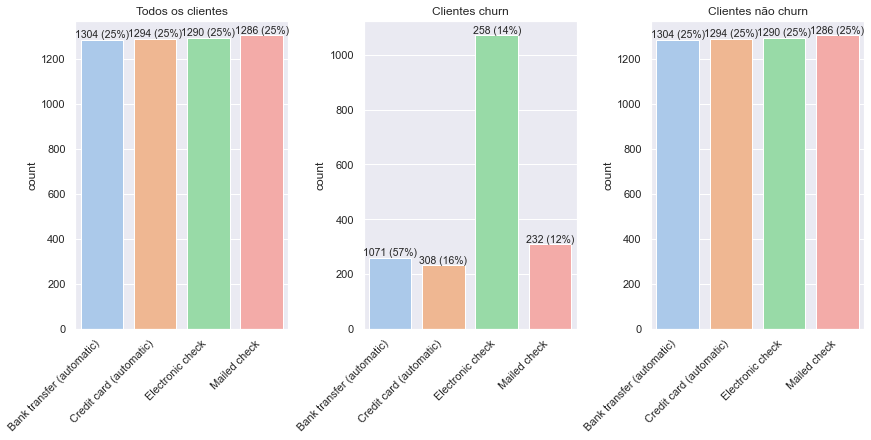

In [38]:
# Visualizando as categorias de pagamentos.
fig, (ax_1, ax_2, ax_3) = plt.subplots(nrows=1, ncols=3, constrained_layout=True)

# Todos os clientes.
compare_plot(client_not_churn, ax_1, 'PaymentMethod', 'Todos os clientes')

# Clientes churn.
compare_plot(client_churn, ax_2, 'PaymentMethod', 'Clientes churn')

# Clientes não churn.
compare_plot(client_not_churn, ax_3, 'PaymentMethod', 'Clientes não churn')

In [39]:
# Clientes não churn com pagamento automático.
client_not_churn_payment_automatic = client_not_churn[
    (client_not_churn['PaymentMethod'] == 'Credit card (automatic)') |
    (client_not_churn['PaymentMethod'] == 'Bank transfer (automatic)')]

client_not_churn_payment_automatic_mean_tenure = client_not_churn_payment_automatic['tenure'].mean()
print(f'Tempo médio de permanência para clientes não churn com pagamento automático: {client_not_churn_payment_automatic_mean_tenure:.2f} meses')

# Clientes churn com pagamento manual.
client_churn_payment_manual = client_churn[
    (client_churn['PaymentMethod'] == 'Mailed check') |
    (client_churn['PaymentMethod'] == 'Electronic check')]

client_churn_payment_manual_mean_tenure = client_churn_payment_manual['tenure'].mean()
print(f'Tempo médio de permanência para clientes churn com pagamento manual: {client_churn_payment_manual_mean_tenure:.2f} meses')

Tempo médio de permanência para clientes não churn com pagamento automático: 46.62 meses
Tempo médio de permanência para clientes churn com pagamento manual: 14.82 meses


In [40]:
# Aplicando o teste de hipótese para tipo de pagamento.
grupo_01 = client_not_churn_payment_automatic['tenure']
grupo_02 = client_churn_payment_manual['tenure']
statistic, p_value = hypothesis_testing(grupo_01, grupo_02)

ic = .95  # Intervalo de confiança de 95%.
alfa = (1 - ic)
print(f'Interpretação do teste de hipótese: Alfa = {alfa:.2f}')

if p_value < alfa:
    print(
        'Rejeitamos H₀, os tempos médios de permanência para clientes '
        'não churn com pagamento automático e clientes churn com pagamento manual são diferentes.')
else:
    print(
        'Não rejeitamos H₁, os tempos médios de permanência para clientes'
        ' não churn com pagamento automático e clientes churn com pagamento manual são iguais.')

Interpretação do teste de hipotesete: Alfa = 0.05
Rejeitamos H₀, os tempos médios de permanência para clientes não churn com pagamento automático e clientes churn com pagamento manual são diferentes.
